# Prueba - Fundamentos Data Science | Desafío 1: Determinantes del ingreso
### Cristian Vidal Muñoz

# Prueba - Hito 1

### Objetivo
Completar el punto de __Preliminares__, así como __Aspectos computacionales__.

__Elementos a considerar__
* Los dos enunciados deben estar clarificados, considerando el tipo de problema a resolver (regresión o clasificación). Para cada uno de los enunciados y su problema identificado, se debe justificar el uso de métricas para medir el desempeño del problema. __(3 puntos)__
* Se debe considerar el uso de las librerías asociadas para la ingesta, preprocesamiento, visualización y modelación, así como métricas de evaluación. __(1 punto)__
* Se debe detallar y considerar el proceso de preprocesamiento y recodificación de datos. __(1punto)__

__INTRODUCCION PROBLEMA:__

Con el objetivo de conocer las dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las Naciones Unidas para el Desarrollo, debemos desarrollar un modelo predictivo sobre la posibilidad de que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en base
a una serie de atributos sociodemográficos.

__TIPO DE PROYECTO:__

Este caso vamos a implementar un predictor de __clasificación binario__. El resultado o variable objetivo es de naturaleza __dicotómica__, donde tenemos que predecir si la salida pertenece a la __clase 1__ (sobre los 50.000 dolares anuales) o __clase 2__ (bajo los 50.000 dolares anuales). Utilizaremos algoritmos de __machine learning de clasificación__ con probabilidades como __LogisticRegression__, aplicaremos la __función logística__ o también llamada __sigmoide__ para obtener la probabilidad, si la salida de la __función sigmoide__ es mayor que 0.5, podemos clasificar el resultado como 1 o sobre50 (sobre los 50.000 dólares anuales) , y si es menor que 0.5 podemos clasificarlo como 0 o bajo50 (bajo los 50.000 dólares anuales). Por su parte si el resultado por ejemplo es .80, podemos decir en términos de probabilidad como, hay un 80% de probabilidades de que el individuo tenga un salario sobre los 50.000 dólares anuales y un 20% de probabilidades de tener un salario bajo los 50.000 dólares anuales.

__METRICAS:__

Algunas de las métricas que utilizaremos para evaluar el __desempeño__ y __precisión__ de nuestro modelo serán:
la __Matriz de Confusión__, analizaremos los resultados predichos por nuestro modelo con los datos __"reales"__ (Verdaderos Positivos, Verdaderos Negativos, Falsos Positivos, Falsos Negativos). Las medidas de desempeño a medir serán las siguientes: __Exactitud, Precisión, Sensibilidad o Recall y Puntaje de F1__. Tambien es importante saber "que tan bueno" puede distinguir el modelo entre dos cosas, para esto utilizaremos __La curva AUC-ROC__.

__LIBRERIAS Y MODULOS:__

Desarrollaremos este caso utilizando la __Suite__ de __Anaconda python__. Para la manipulación, operaciones y preparación de los datos usaremos __Pandas__ y __NumPy__.  Para la visualización de los datos utilizaremos __missingno (matrix)__, __matplotlib (plt)__ y __Seaborn (sns)__. Nuestro análisis estadístico y econométrico lo haremos con __Statsmodels (smf.logit)__. Para los algoritmos de Machine Learning, validaciones y metricas de desempeño utilizaremos __Scikit-learn (LogisticRegression, train_test_split, classification_report, auc, roc_auc_score, roc_curve)__.

__ASPECTOS COMPUTACIONALES__
* python: 3.7.3
* python-bits: 64
* jupyter notebook 5.7.8
* conda 4.8.3
* pandas: 0.24.2
* pip: 19.0.3
* numpy: 1.16.2
* scipy: 1.2.1
* matplotlib: 3.0.3
* seaborn 0.9.0
* statsmodels 0.9.0
* sklearn 0.20.3

# Prueba - Hito 2

### Objetivo

Completar el punto de __Descripción__.

sección llamada __Descripción__ donde se generará un análisis descriptivo considerando el
tipo de variables (desde el punto de vista estadístico así como computacional). Esta sección
debe considerar medidas univariadas/ frecuencias, datos perdidos y gráficos distributivos sobre
las variables a analizar. A partir de ésta se debe clarificar la estrategia de preprocesamiento
(datos perdidos, recodificaciones).

### Elementos a considerar
* La inspección visual del vector objetivo. (2 puntos)
* La inspección visual de las variables. (2 puntos)
* La inspección de datos perdidos en las variables. (1 punto)

De ser necesario, se puede iterar en el proceso de preprocesamiento y recodificación de las variables

In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import sklearn

#Importamos funciones auxiliares
import helpers as funcion_auxiliar
import statsmodels.formula.api as smf

#Configuración de graficos
plt.style.use('ggplot')

#Ignorar Avisos
import warnings
warnings.filterwarnings("ignore")

## Aspectos adicionales a considerar

* La base de datos contiene los valores perdidos como ? . Deberá transformarlos para poder trabajar de forma adecuada.

In [2]:
df = pd.read_csv('income-db.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
print("Cantidad de registros:{}, Cantidad de columnas: {}".format(df.shape[0], df.shape[1]))

Cantidad de registros:48842, Cantidad de columnas: 15


* Corregir datos con valores "?"

In [5]:
df = df.replace('?', np.nan)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          46043 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     47985 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Inspección de datos perdidos en las variables

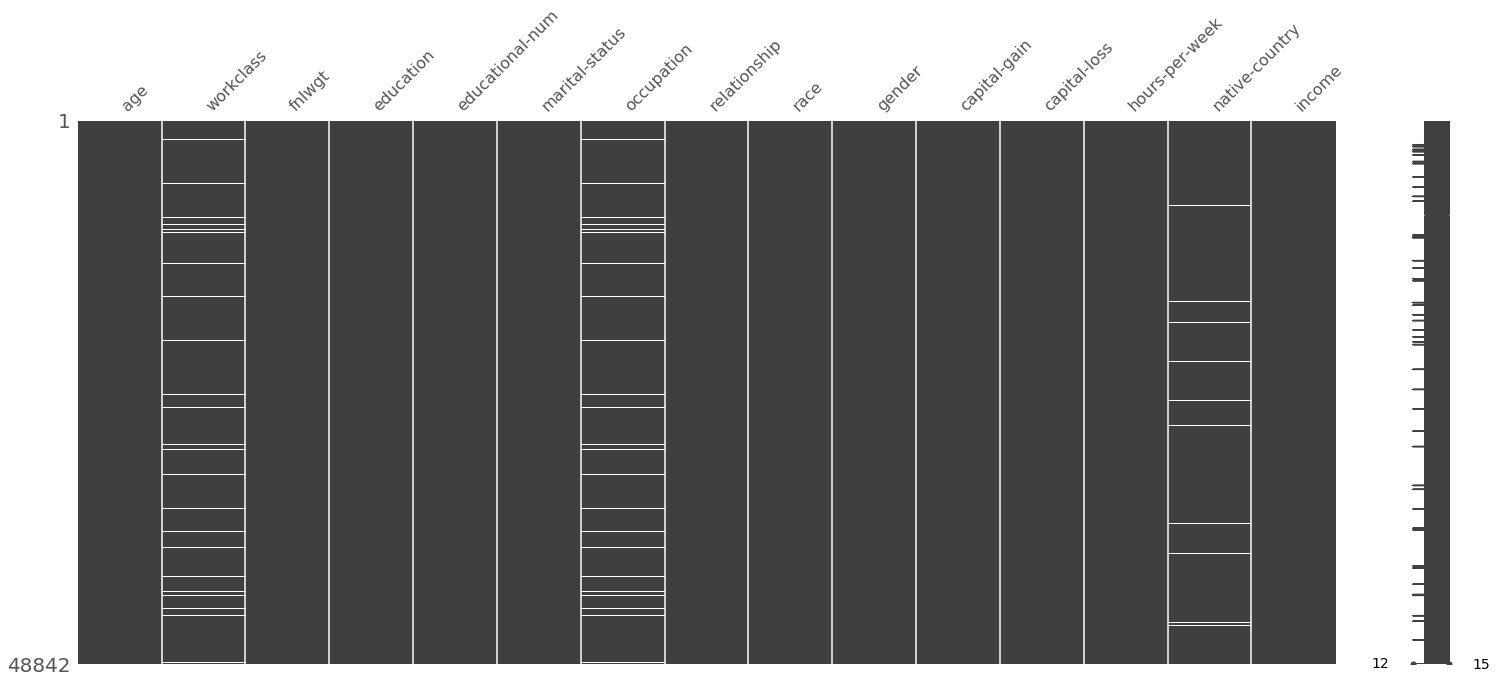

In [7]:
missingno.matrix(df)

In [8]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
round(df.isnull().sum()/df.shape[0]*100, 2)

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

* La variable __occupation__ tiene 2.809 __(5.75%)__ datos perdidos
* La variable __workclass__ tiene 2.799 __(5.73%)__ datos perdidos
* La variable __native-country__ tiene 857 __(1.75%)__ datos perdidos 

__Se observa que a lo largo de todas las variables las tasas de datos perdidos son nulas (a excepción de occupation, workclass, native-country)__

In [10]:
df_dropped = df.dropna()

In [11]:
print(f"El porcentaje de datos perdidos si eliminamos todos los N/A es de: {round(100-len(df_dropped)/len(df)*100, 2)}%")

El porcentaje de datos perdidos si eliminamos todos los N/A es de: 7.41%


In [12]:
print("DataFrame sin aplicar dropna")
print("Cantidad de registros:{}, Cantidad de columnas: {}".format(df.shape[0], df.shape[1]))

DataFrame sin aplicar dropna
Cantidad de registros:48842, Cantidad de columnas: 15


In [13]:
print("DataFrame aplicando dropna")
print("Cantidad de registros:{}, Cantidad de columnas: {}".format(df_dropped.shape[0], df_dropped.shape[1]))

DataFrame aplicando dropna
Cantidad de registros:45222, Cantidad de columnas: 15


####  Podemos observar que si aplicamos dropna a nuestra muestra original vamos a eliminar  3.620 registros (Vamos a continuar con nuestro análisis aplicando dropna a nuestra muestra original)

In [14]:
df = df.dropna()

## Proceso de preprocesamiento y recodificación de las variables

Desde la organización le sugieren que debe recodificar las siguientes variables acorde a las siguientes nomenclaturas:

* __occupation__ debe recodificarse como __collars__ siguiendo una nomenclatura similar a:
    * __white-collar__  $\leftarrow$ Prof-specialty, Exec-managerial, Adm-clerical, Sales, Tech-support.
    * __blue-collar__  $\leftarrow$ Craft-repair, Machine-op-inspct, Transport-moving, Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.
    * __others__  $\leftarrow$ Other-service, Armed-Forces

In [15]:
#occupation -> white-collar
df['occupation'] = df['occupation'].replace(['Prof-specialty', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Tech-support'],
                                            ['white-collar','white-collar','white-collar', 'white-collar', 'white-collar'])
#occupation -> blue-collar
df['occupation'] = df['occupation'].replace(['Craft-repair', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Protective-serv', 'Priv-house-serv'],
                                            ['blue-collar', 'blue-collar', 'blue-collar', 'blue-collar', 'blue-collar', 'blue-collar', 'blue-collar'])
#occupation -> others
df['occupation'] = df['occupation'].replace(['Other-service', 'Armed-Forces'],
                                            ['others', 'others'])

#Renombramos la columna occupation por collars
df = df.rename(columns={"occupation": "collars"})

* __workclass__ debe recodificarse como __workclass_recod__ siguiendo una nomenclatura similar a :
    * __federal-gov__ $\leftarrow$ Federal-gov.
    * __state-level-gov__ $\leftarrow$ State-gov, Local-gov.
    * __self-employed__ $\leftarrow$ Self-emp-inc, Self-emp-not-inc
    * __unemployed__ $\leftarrow$ Never-worked, Without-pay.

In [16]:
#workclass -> federal-gov
df['workclass'] = df['workclass'].replace(['Federal-gov'],
                                          ['federal-gov'])

#workclass -> state-level-gov
df['workclass'] = df['workclass'].replace(['State-gov', 'Local-gov'],
                                          ['state-level-gov', 'state-level-gov'])

#workclass -> self-employed
df['workclass'] = df['workclass'].replace(['Self-emp-inc', 'Self-emp-not-inc'],
                                          ['self-employed', 'self-employed'])

#workclass -> unemployed
df['workclass'] = df['workclass'].replace(['Never-worked', 'Without-pay'],
                                          ['unemployed', 'unemployed'])

#Renombramos la columna workclass por workclass_recod
df = df.rename(columns={"workclass": "workclass_recod"})

* __education__ debe recodificarse como __educ_recod__ siguiendo una nomenclatura similar a :
    * __preschool__ $\leftarrow$ Preschool
    * __elementary-school__ $\leftarrow$ 1st-4th, 5th-6th
    * __high-school__ $\leftarrow$ 7th-8th, 9th, 10th,11th, 12th, HS-grad
    * __college__ $\leftarrow$ Assoc-voc, Assoc-acdm, Some-college
    * __university__ $\leftarrow$ Bachelors, Masters, Prof-school, Doctorate

In [17]:
#education -> preschool
df['education'] = df['education'].replace(['Preschool'],
                                          ['preschool'])

#education -> elementary-school
df['education'] = df['education'].replace(['1st-4th', '5th-6th'],
                                          ['elementary-school', 'elementary-school'])

#education -> high-school
df['education'] = df['education'].replace(['7th-8th', '9th', '10th', '11th', '12th', 'HS-grad'],
                                          ['high-school', 'high-school', 'high-school', 'high-school', 'high-school', 'high-school'])

#education -> college
df['education'] = df['education'].replace(['Assoc-voc', 'Assoc-acdm', 'Some-college'], 
                                          ['college', 'college', 'college'])

#education -> university
df['education'] = df['education'].replace(['Bachelors', 'Masters', 'Prof-school', 'Doctorate'], 
                                          ['university', 'university', 'university', 'university'])

#Renombramos la columna education por educ_recod
df = df.rename(columns={"education": "educ_recod"})

* __marital-status__ debe recodificarse como __civstatus__ siguiendo una nomenclatura similar a:
    * __married__ $\leftarrow$ Married-civ-spouse, Married-spouse-absent, Married-AF-spouse
    * __divorced__ $\leftarrow$ Divorced
    * __separated__ $\leftarrow$ Separated
    * __widowed__ $\leftarrow$ Widowed.

In [18]:
#marital-status -> married
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
                                                    ['married', 'married', 'married'])

#marital-status -> divorced
df['marital-status'] = df['marital-status'].replace(['Divorced'],
                                                    ['divorced'])

#marital-status -> separated
df['marital-status'] = df['marital-status'].replace(['Separated'],
                                                    ['separated'])

#marital-status -> widowed
df['marital-status'] = df['marital-status'].replace(['Widowed'],
                                                    ['widowed'])

#Renombramos la columna marital-status por civstatus
df = df.rename(columns={"marital-status": "civstatus"})

* __native-country__ debe recodificarse como __region__ donde cada país debe asignarse a uno de los 5 continentes

In [19]:
#native-country -> america
df['native-country'] = df['native-country'].replace([
    'United-States', 'Mexico', 'Puerto-Rico',
    'Canada', 'El-Salvador', 'Cuba',
    'Jamaica', 'Dominican-Republic', 'Guatemala',
    'Columbia', 'Haiti', 'Nicaragua',
    'Peru', 'Ecuador', 'Trinadad&Tobago', 
    'Outlying-US(Guam-USVI-etc)', 'Honduras'
],[
    'america', 'america', 'america', 
    'america', 'america', 'america', 
    'america', 'america', 'america',
    'america', 'america', 'america',
    'america', 'america', 'america',
    'america', 'america'
])

#native-country -> asia
df['native-country'] = df['native-country'].replace([
    'Philippines', 'India', 'China',
    'Japan', 'Vietnam', 'Taiwan',
    'Iran', 'Hong', 'Thailand',
    'Cambodia', 'Laos', 'South'
],[
    'asia', 'asia','asia', 
    'asia', 'asia', 'asia', 
    'asia', 'asia', 'asia',
    'asia', 'asia','asia'
])


#native-country -> europa
df['native-country'] = df['native-country'].replace([
    'Germany', 'England', 'Italy',
    'Poland', 'Portugal', 'Greece',
    'France', 'Ireland', 'Yugoslavia',
    'Scotland', 'Hungary', 'Holand-Netherlands'
],[
    'europa', 'europa','europa', 
    'europa', 'europa', 'europa', 
    'europa', 'europa', 'europa',
    'europa', 'europa','europa'
])

#Renombramos el nombre de la columna
df = df.rename(columns={"native-country": "region"})

* __income__ debe recodificarse de forma binaria.

In [20]:
df['income'] = np.where(df['income'] == '>50K', 1, 0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
age                45222 non-null int64
workclass_recod    45222 non-null object
fnlwgt             45222 non-null int64
educ_recod         45222 non-null object
educational-num    45222 non-null int64
civstatus          45222 non-null object
collars            45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
gender             45222 non-null object
capital-gain       45222 non-null int64
capital-loss       45222 non-null int64
hours-per-week     45222 non-null int64
region             45222 non-null object
income             45222 non-null int64
dtypes: int64(7), object(8)
memory usage: 5.5+ MB


In [22]:
df.sample(5)

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income
17548,50,self-employed,343748,college,10,married,blue-collar,Husband,White,Male,0,0,35,america,0
21193,38,Private,168680,college,10,Never-married,white-collar,Own-child,Black,Female,0,0,40,america,0
21264,34,Private,117963,university,15,married,white-collar,Husband,White,Male,0,0,50,america,1
35809,28,Private,173110,high-school,9,Never-married,white-collar,Not-in-family,White,Female,0,0,40,america,0
19741,38,Private,364782,high-school,9,married,blue-collar,Husband,White,Male,0,0,40,america,1


## Inspección visual de las variables

In [23]:
for i in df.columns:
    if len(df[i].value_counts()) < 10 or df[i].dtypes == 'object':
        print('-------------------------------------------')
        print('#### {} ####'.format(i))
        print(round(df[i].value_counts('%'),2))
        print()
    else:
        print('-------------------------------------------')
        print('#### {} ####'.format(i))
        print(round(df[i].describe()))
        print()

-------------------------------------------
#### age ####
count    45222.0
mean        39.0
std         13.0
min         17.0
25%         28.0
50%         37.0
75%         47.0
max         90.0
Name: age, dtype: float64

-------------------------------------------
#### workclass_recod ####
Private            0.74
self-employed      0.12
state-level-gov    0.11
federal-gov        0.03
unemployed         0.00
Name: workclass_recod, dtype: float64

-------------------------------------------
#### fnlwgt ####
count      45222.0
mean      189735.0
std       105639.0
min        13492.0
25%       117388.0
50%       178316.0
75%       237926.0
max      1490400.0
Name: fnlwgt, dtype: float64

-------------------------------------------
#### educ_recod ####
high-school          0.44
college              0.30
university           0.25
elementary-school    0.01
preschool            0.00
Name: educ_recod, dtype: float64

-------------------------------------------
#### educational-num ####
count   

In [24]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017,0.247844
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508,0.431766
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


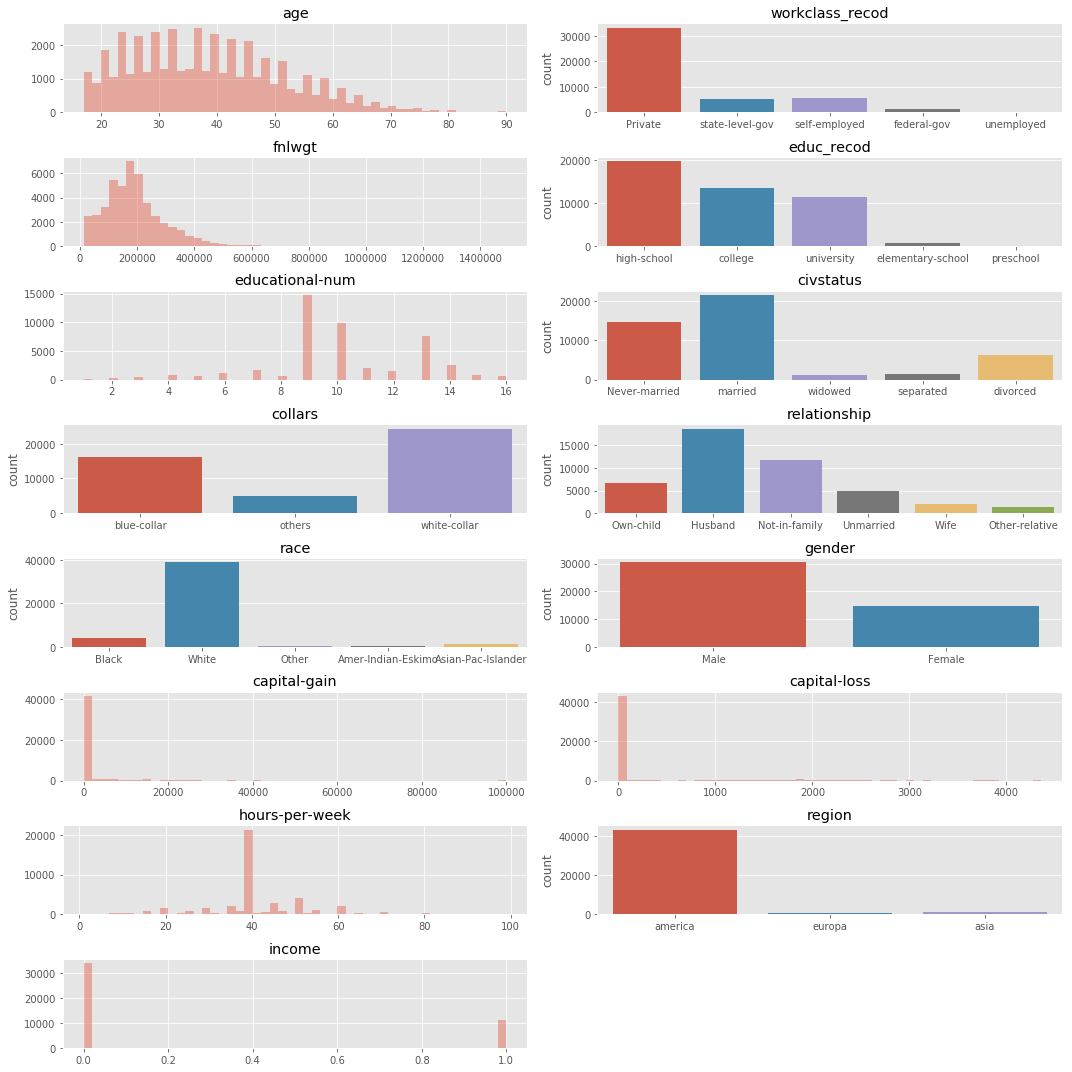

In [25]:
plt.rcParams['figure.figsize'] = (15, 15)
funcion_auxiliar.explorar_variables(df)

__Interpretación variables:__

__age:__ Edad del individuo
* Observamos que el promedio de edad de las personas de la muestra es __38 años__, la edad mínima es __17 años__ y la edad máxima es __90 años__, si bien el __75%__ de las personas no superan los __48 años__, existen personas mayores de __75 años__ que aún trabajan.

__workclass_recod:__ Naturaleza de la organización que emplea al individuo
* A simple vista podemos notar que la mayoría de las personas de la muestra trabajan en el sector __privado__ (Presenta 5 clases).

__educ_recod:__ Nivel educacional del individuo
* La mayoría de las personas tienen un titulo de secundaria (7mo-8vo, 1ro medio, 2do medio, 3ro medio, Secundaria completa) con un 44%, seguido de personas que tienen un titulo de nivel superior con un 30%.

__civstatus:__ Estado civil del individuo
* La mayoría de las personas de la muestra están casados/as (casadas, cónyuge civil) con un 48%, seguido por personas solteras/os con un 32% (Presenta 5 clases).

__collars:__ Ocupación del individuo
* La mayoría de las personas de la muestra trabajan en la categoría __"white-collar"__ (54%) es decir trabajan como Profesores, Ejecutivo administrativos, Administrativos servicio al cliente, Ventas o Soporte técnico (Presenta 3 clases). 

__relationship:__ Relación respecto a su familia
* La mayoría de las personas de la muestra están en una relación como __"esposo"__ (41%). (Presenta 6 clases)

__race:__ Raza del encuestado
* La mayoría de las personas de la muestra son de raza __"Blanco caucásico"__ (86%). (Presenta 5 clases)

__gender:__ Genero del encuestado
* La mayoría de las personas de la muestra son de genero __"masculino"__ (68%). (Presenta 2 clases)

__capital-gains:__ Ingresos generados por inversiones fuera del trabajo
* Se puede observar que muy pocas personas tienen ingresos generados por inversiones fuera del trabajo.

__capital-losses:__ Pérdidas generadas por inversiones fuera del trabajo
* La mayoría de las personas de la muestra no invierten mucho (fuera del trabajo), por este motivo las personas no tienen perdidas generadas por inversiones.

__hours-per-week:__ Cantidad de horas trabajadas por semana
* Observamos que el promedio de la cantidad de horas trabajadas por semana es 40,4. El 75% de las personas trabajan alrededor de 45 horas por semana.

__region:__ País de origen
* La mayoría de las personas de la muestra son del continente __americano__ (96%) (Presenta 3 clases).

__income:__ Si el individuo percibe ingresos >50K o <=50K 
La mayoría de las personas de la muestra tienen __ingresos inferiores a 50.000 dolares anuales__ (75%) (Presenta 2 clases).

In [26]:
var_numericas, var_categoricas = funcion_auxiliar.get_var_categoricas_numericas(df)
print("Las variables numéricas son {}".format(var_numericas))
print("Las variables catergóricas son {}".format(var_categoricas))

Las variables numéricas son ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
Las variables catergóricas son ['workclass_recod', 'educ_recod', 'civstatus', 'collars', 'relationship', 'race', 'gender', 'region']


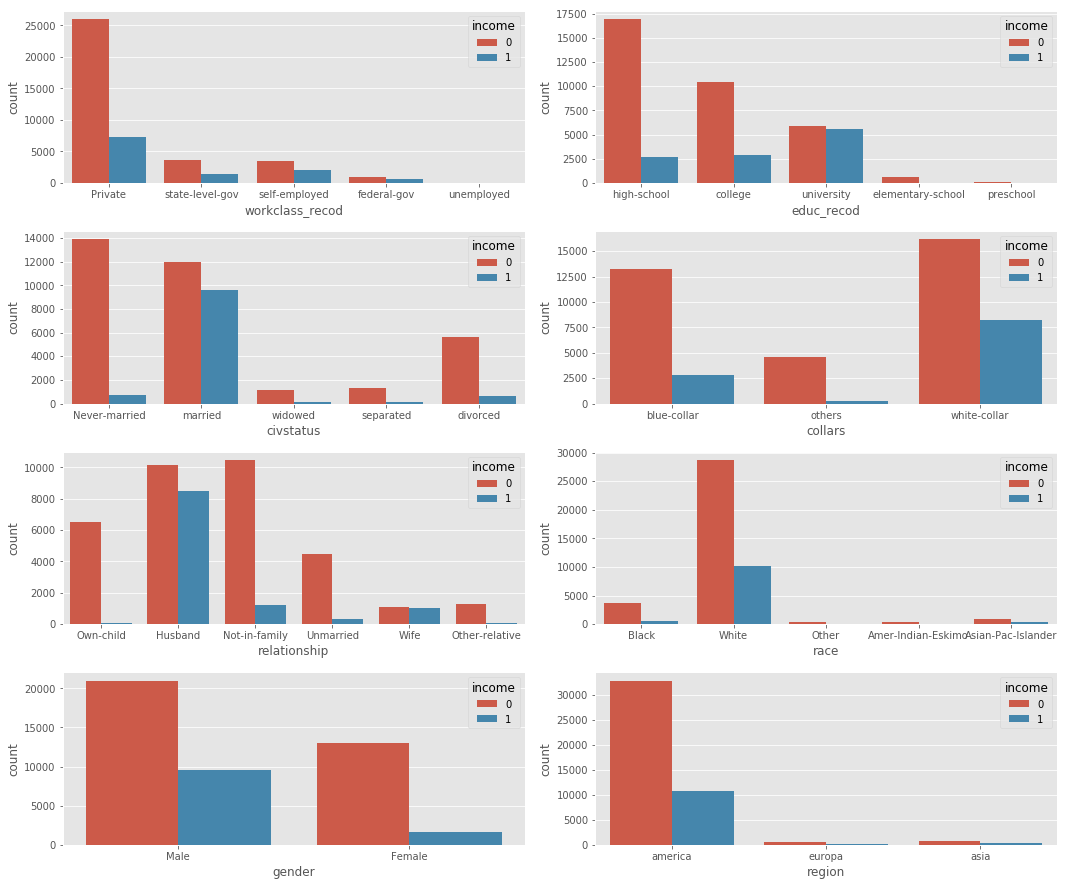

In [27]:
fig = plt.figure(figsize=(15,15))
funcion_auxiliar.inspeccionar_vector_objetivo(df, var_categoricas, 'income')

__Podemos observar que muy pocas personas tienen ingresos superiores a los 50.000 dolares anuales, pero podemos ver que para aquellas personas que tienen un "titulo universitario" o que están en una relación, estado civil como "Casado/a" existe una cantidad significativa de individuos que tienen ingresos superiores a los 50.000 dolares anuales.__

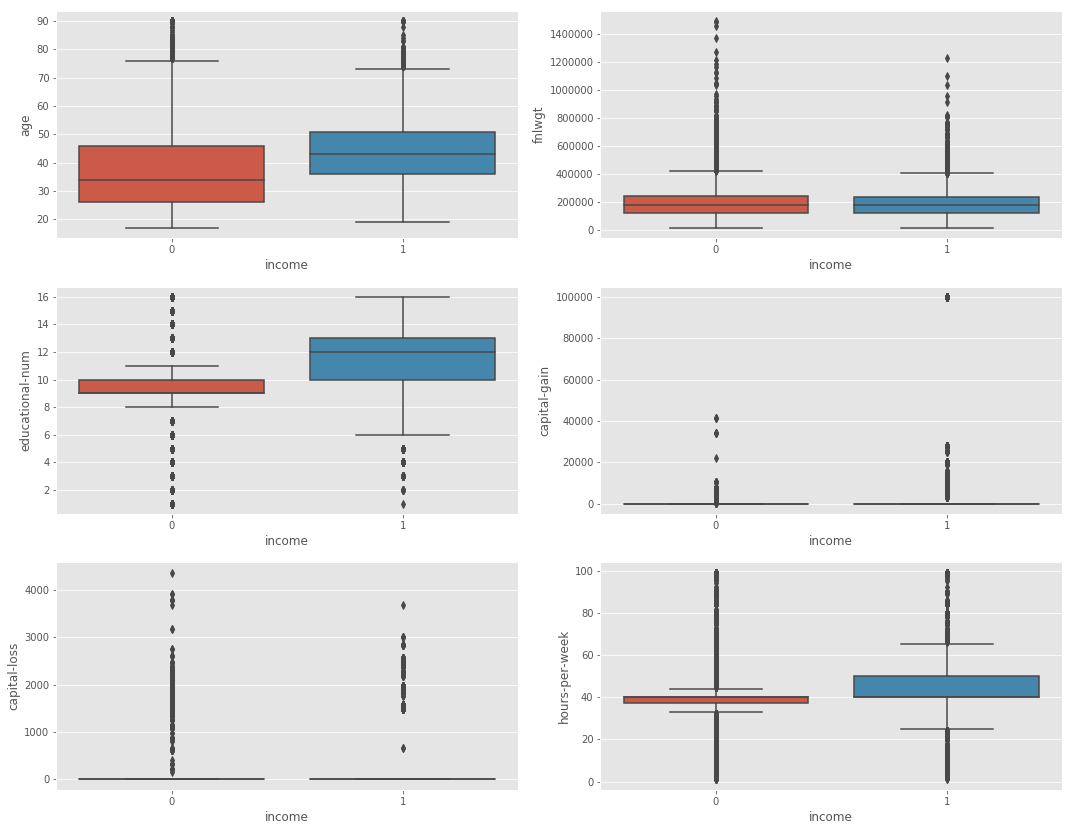

In [28]:
fig = plt.figure(figsize=(15,15))
funcion_auxiliar.inspeccionar_vector_objetivo(df, var_numericas, 'income', 'boxplot')

* __Podemos observar que las personas que tienen ingresos superiores a los 50.000 dolares anuales tienen mas edad en comparación con las personas que tienen ingresos inferiores a los 50.000 dolares anuales__.
* __Las personas que tienen ingresos superiores a los 50.000 dolares anuales tienen mas años de estudios en comparación con las personas que tienen ingresos inferiores a los 50.000 dolares anuales__.
* __Las personas que tienen ingresos superiores a los 50.000 dolares anuales trabajan mas horas semanales en comparación con las personas que tienen ingresos inferiores a los 50.000 dolares anuales__.

# Prueba - Hito 3

# Modelacion descriptiva

In [29]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.sample(5)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_recod_federal-gov,workclass_recod_self-employed,workclass_recod_state-level-gov,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,region_asia,region_europa
39363,38,184456,9,3464,0,80,0,0,1,0,...,0,0,0,0,0,0,1,1,0,1
36110,55,208451,14,0,0,40,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
11349,19,303652,9,0,0,30,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
32319,24,182163,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
33988,58,223400,12,0,0,35,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [30]:
new_corr = df_dummies.corr()
round(new_corr['income'].sort_values(ascending=False), 2)

income                             1.00
civstatus_married                  0.44
educational-num                    0.33
educ_recod_university              0.32
age                                0.24
hours-per-week                     0.23
collars_white-collar               0.22
capital-gain                       0.22
gender_Male                        0.22
capital-loss                       0.15
relationship_Wife                  0.12
workclass_recod_self-employed      0.10
race_White                         0.08
workclass_recod_federal-gov        0.06
workclass_recod_state-level-gov    0.03
region_asia                        0.02
region_europa                      0.02
race_Asian-Pac-Islander            0.01
fnlwgt                            -0.01
workclass_recod_unemployed        -0.01
educ_recod_preschool              -0.02
race_Other                        -0.02
educ_recod_elementary-school      -0.06
civstatus_widowed                 -0.06
civstatus_separated               -0.07


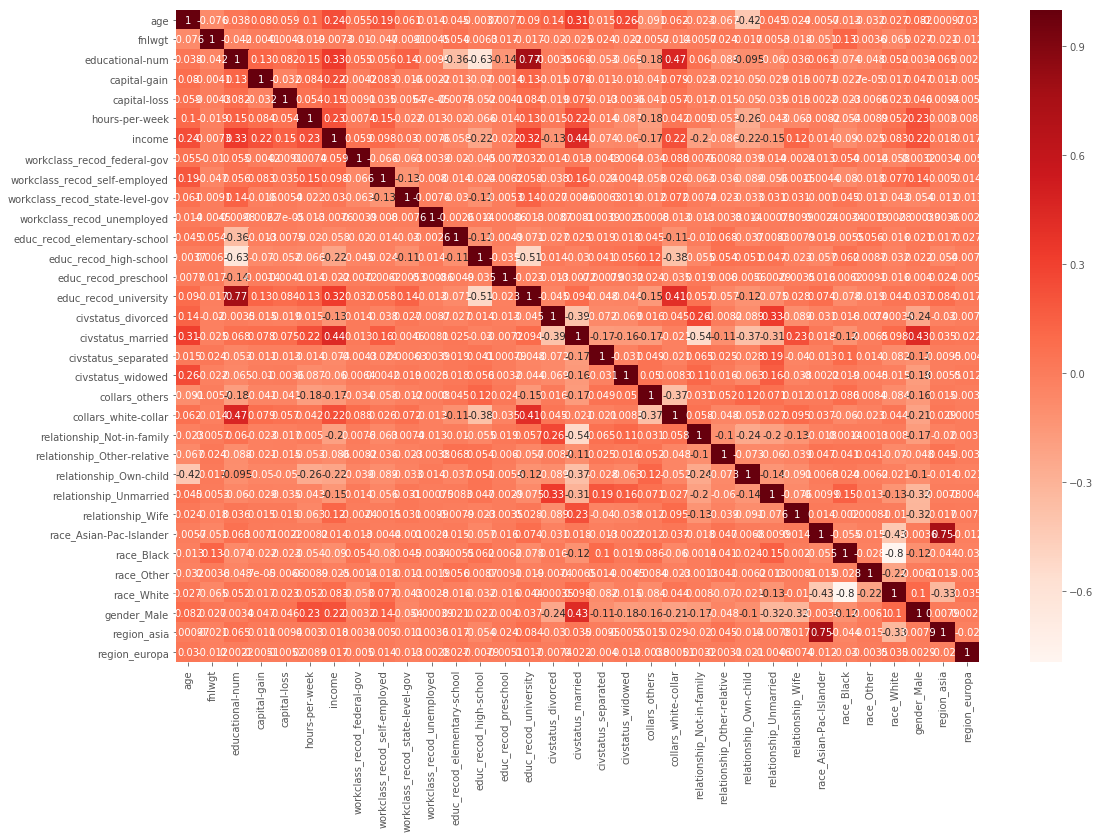

In [31]:
corr = df_dummies.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr, cmap='Reds',annot=True)

__Podemos observar algunas correlaciones bajas con nuestro vector objetivo:__
* Hay una correlación moderada entre la variable "civstatus_married" y "income" (0.44)
* Hay una correlación baja entre la variable "educ_recod_university" y "income" (0.32)
* Hay una correlación baja entre la variable "age" y "income" (0.24)
* Hay una correlación baja entre la variable "hours-per-week" y "income" (0.23)
* Hay una correlación baja entre la variable "capital-gain" y "income" (0.22)
* Hay una correlación baja entre la variable "gender_Male" y "income" (0.22)
* Hay una correlación baja entre la variable "educ_recod_high-school" y "income" (-0.22)
* Hay una correlación baja entre la variable "relationship_Own-child" y "income" (-0.22)
* Hay una correlación baja entre la variable "relationship_Not-in-family" y "income" (-0.20)

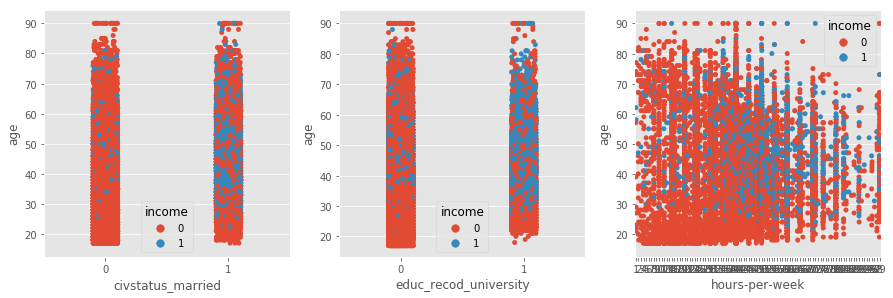

In [32]:
plt.figure(figsize=(15, 10))
plt.subplot((3/3)+1, 3, 1)
sns.stripplot(df_dummies['civstatus_married'], df_dummies['age'], hue= df_dummies['income'], data=df_dummies)
plt.subplot((3/3)+1, 3, 2)
sns.stripplot(df_dummies['educ_recod_university'], df_dummies['age'], hue= df_dummies['income'], data=df_dummies)
plt.subplot((3/3)+1, 3, 3)
sns.stripplot(df_dummies['hours-per-week'], df_dummies['age'], hue= df_dummies['income'], data=df_dummies)

* Podemos ver de manera mucho mas clara que las personas que tienen ingresos superiores a los 50.000 dolares anuales están casados.
* Podemos ver de manera mucho mas clara que las personas que tienen ingresos superiores a los 50.000 dolares anuales tienen estudios universitarios.
* Podemos ver de manera mucho mas clara que las personas que tienen ingresos superiores a los 50.000 dolares anuales trabajan mas horas en la semana.

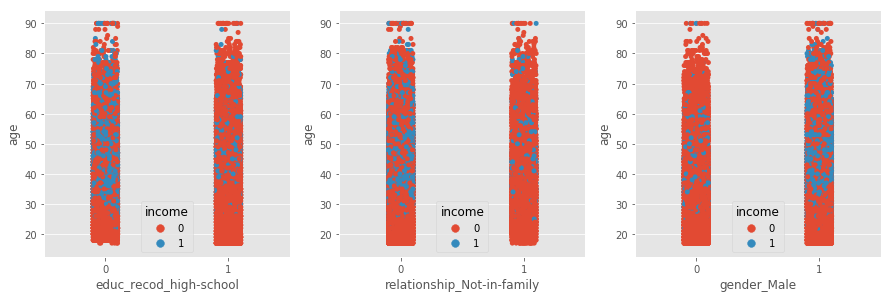

In [33]:
plt.figure(figsize=(15, 10))
plt.subplot((3/3)+1, 3, 1)
sns.stripplot(df_dummies['educ_recod_high-school'], df_dummies['age'], hue= df_dummies['income'], data=df_dummies)
plt.subplot((3/3)+1, 3, 2)
sns.stripplot(df_dummies['relationship_Not-in-family'], df_dummies['age'], hue= df_dummies['income'], data=df_dummies)
plt.subplot((3/3)+1, 3, 3)
sns.stripplot(df_dummies['gender_Male'], df_dummies['age'], hue= df_dummies['income'], data=df_dummies)

* Podemos ver de manera mucho mas clara que las personas que tienen ingresos superiores a los 50.000 dolares anuales tienen enseñanza media completa (colegio).
* Podemos ver de manera mucho mas clara que las personas que tienen ingresos superiores a los 50.000 dolares anuales no tienen una familia conformada.
* Podemos ver de manera mucho mas clara que las personas que tienen ingresos superiores a los 50.000 dolares anuales son hombres.

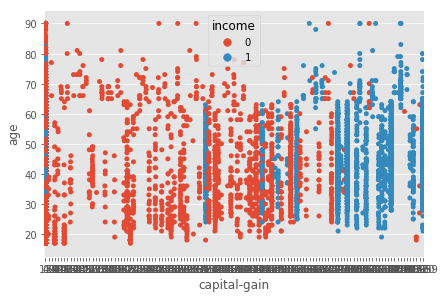

In [34]:
plt.figure(figsize=(15, 10))
plt.subplot((3/3)+1, 2, 1)
sns.stripplot(df_dummies['capital-gain'], df_dummies['age'], hue= df_dummies['income'], data=df_dummies)

* Podemos ver de manera mucho mas clara que las personas que tienen ingresos superiores a los 50.000 dolares anuales tienen ingresos generados por inversiones fuera del trabajo.

__Al parecer los ingresos no tienen una relación muy fuerte con la edad.__

## Modelación descriptiva

In [35]:
#Regresión logistica
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
columnas_recodificadas = [i.replace("-","_") for i in df_dummies.columns]
df_dummies.columns = columnas_recodificadas

## Modelación descriptiva para income (Modelo Saturado)

In [37]:
predictores = ' + '.join(df_dummies.drop(['income'], axis=1).columns)
predictores

'age + fnlwgt + educational_num + capital_gain + capital_loss + hours_per_week + workclass_recod_federal_gov + workclass_recod_self_employed + workclass_recod_state_level_gov + workclass_recod_unemployed + educ_recod_elementary_school + educ_recod_high_school + educ_recod_preschool + educ_recod_university + civstatus_divorced + civstatus_married + civstatus_separated + civstatus_widowed + collars_others + collars_white_collar + relationship_Not_in_family + relationship_Other_relative + relationship_Own_child + relationship_Unmarried + relationship_Wife + race_Asian_Pac_Islander + race_Black + race_Other + race_White + gender_Male + region_asia + region_europa'

In [38]:
m1_logit = smf.logit('income ~ {}'.format(predictores), data= df_dummies).fit()

Optimization terminated successfully.
         Current function value: 0.331645
         Iterations 11


In [39]:
m1_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45189
Method:                           MLE   Df Model:                           32
Date:                Sat, 25 Jul 2020   Pseudo R-squ.:                  0.4077
Time:                        16:32:07   Log-Likelihood:                -14998.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -8.6959      0.301    -28.852      0.000      -9.287      -8.105
age                                 0.0253      0.001     18.673      0.000       0.023       0.028
fnlwgt                           7.353e-07    1.4e-07      5.253      0.000    4.61e-07    1.01e-06
educational_num                     0.2768      0.016     17.258      0.000       0.245       0.308
capital_gain                        0.0003   8.61e-06     36.894      0.000       0.000       0.000
capital_loss                        0.0007   3.08e-05     21.319      0.000       0.001       0.001
hours_per_week                      0.0297      0.001     22.483      0.000       0.027       0.032
workclass_recod_federal_gov         0.4456      0.075      5.942      0.000       0.299       0.593
workclass_recod_self_employed      -0.3429      0.042     -8.120      0.000      -0.426      -0.260
workclass_recod_state_level_gov    -0.0735      0.046     -1.602      0.109      -0.163       0.016
workclass_recod_unemployed         -1.1019      0.800     -1.377      0.169      -2.671       0.467
educ_recod_elementary_school        0.1452      0.237      0.612      0.540      -0.320       0.610
educ_recod_high_school             -0.0648      0.047     -1.386      0.166      -0.156       0.027
educ_recod_preschool               -3.9733      4.067     -0.977      0.329     -11.945       3.999
educ_recod_university               0.0879      0.061      1.446      0.148      -0.031       0.207
civstatus_divorced                  0.4875      0.072      6.749      0.000       0.346       0.629
civstatus_married                   1.2946      0.137      9.479      0.000       1.027       1.562
civstatus_separated                 0.4572      0.135      3.398      0.001       0.193       0.721
civstatus_widowed                   0.5764      0.133      4.347      0.000       0.316       0.836
collars_others                     -0.7289      0.087     -8.387      0.000      -0.899      -0.559
collars_white_collar                0.6016      0.035     17.010      0.000       0.532       0.671
relationship_Not_in_family         -0.9589      0.134     -7.166      0.000      -1.221      -0.697
relationship_Other_relative        -1.4183      0.187     -7.580      0.000      -1.785      -1.052
relationship_Own_child             -1.9398      0.166    -11.670      0.000      -2.266      -1.614
relationship_Unmarried             -1.1899      0.150     -7.915      0.000      -1.485      -0.895
relationship_Wife                   1.0600      0.084     12.599      0.000       0.895       1.225
race_Asian_Pac_Islander             0.8007      0.223      3.587      0.000       0.363       1.238
race_Black                          0.2628      0.189      1.390      0.165      -0.108       0.634
race_Other                          0.2419      0.272      0.889      0.374      -0.291       0.775
race_White                          0.507

Las variables independientes que tienen un efecto significativo sobre el aumento en el ingreso anual como lo indican los valores de __P>|z| < 0.05__ son: age, fnlwgt,  educational_num, capital_gain, capital_loss, hours_per_week, workclass_recod_federal_gov, workclass_recod_self_employed, civstatus_divorced, civstatus_married, civstatus_separated, civstatus_widowed, collars_others, collars_white_collar, relationship_Not_in_family, relationship_Other_relative, relationship_Own_child, relationship_Unmarried, relationship_Wife, race_Asian_Pac_Islander, race_White, gender_Male y region_asia __( significancia estadística al 95% )__.

## Modelación descriptiva para income (predictores significativo)

In [40]:
m1_logit_2 = smf.logit('income ~ age + fnlwgt + educational_num + capital_gain + capital_loss + hours_per_week + workclass_recod_federal_gov + workclass_recod_self_employed + civstatus_divorced + civstatus_married + civstatus_separated + civstatus_widowed + collars_others + collars_white_collar + relationship_Not_in_family + relationship_Other_relative + relationship_Own_child + relationship_Unmarried + relationship_Wife + race_Asian_Pac_Islander + race_White + gender_Male + region_asia', data= df_dummies).fit()

Optimization terminated successfully.
         Current function value: 0.331854
         Iterations 9


In [41]:
m1_logit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45198
Method:                           MLE   Df Model:                           23
Date:                Sat, 25 Jul 2020   Pseudo R-squ.:                  0.4074
Time:                        16:32:08   Log-Likelihood:                -15007.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -8.7137      0.198    -43.910      0.000      -9.103      -8.325
age                               0.0252      0.001     18.742      0.000       0.023       0.028
fnlwgt                         7.592e-07   1.39e-07      5.452      0.000    4.86e-07    1.03e-06
educational_num                   0.2982      0.007     41.531      0.000       0.284       0.312
capital_gain                      0.0003    8.6e-06     36.914      0.000       0.000       0.000
capital_loss                      0.0007   3.08e-05     21.341      0.000       0.001       0.001
hours_per_week                    0.0297      0.001     22.504      0.000       0.027       0.032
workclass_recod_federal_gov       0.4554      0.074      6.118      0.000       0.310       0.601
workclass_recod_self_employed    -0.3313      0.042     -7.970      0.000      -0.413      -0.250
civstatus_divorced                0.4803      0.072      6.666      0.000       0.339       0.622
civstatus_married                 1.2959      0.136      9.502      0.000       1.029       1.563
civstatus_separated               0.4488      0.134      3.340      0.001       0.185       0.712
civstatus_widowed                 0.5674      0.132      4.285      0.000       0.308       0.827
collars_others                   -0.7234      0.087     -8.329      0.000      -0.894      -0.553
collars_white_collar              0.6115      0.035     17.451      0.000       0.543       0.680
relationship_Not_in_family       -0.9495      0.134     -7.107      0.000      -1.211      -0.688
relationship_Other_relative      -1.4084      0.187     -7.525      0.000      -1.775      -1.042
relationship_Own_child           -1.9335      0.166    -11.653      0.000      -2.259      -1.608
relationship_Unmarried           -1.1827      0.150     -7.877      0.000      -1.477      -0.888
relationship_Wife                 1.0581      0.084     12.584      0.000       0.893       1.223
race_Asian_Pac_Islander           0.5734      0.144      3.971      0.000       0.290       0.856
race_White                        0.2800      0.058      4.861      0.000       0.167       0.393
gender_Male                       0.7852      0.064     12.235      0.000       0.659       0.911
region_asia                      -0.5122      0.150     -3.423      0.001      -0.805      -0.219
=================================================================================================
"""

Podemos observar que no existe una diferencia significativa entre los valores de __"Pseudo R-squ."__ de ambos modelos. Las variables que aportan mayor contribución son relationship_Own_child, civstatus_married, relationship_Other_relative, relationship_Own_child, relationship_Unmarried y relationship_Wife.

# Prueba - Hito 4

## Modelacion Predictiva para income

In [42]:
#RegresiónLineal Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,mean_squared_error, r2_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [43]:
########## IMPLEMENTACIÓN DE REGRESIÓN LOGÍSTICA ##########

In [44]:
#Seleccionamos todas las columnas predictoras
X = df_dummies[['age', 'fnlwgt', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'workclass_recod_federal_gov', 
                'workclass_recod_self_employed', 'civstatus_divorced', 'civstatus_married', 
                'civstatus_separated', 'civstatus_widowed', 'collars_others', 
                'collars_white_collar', 'relationship_Not_in_family', 
                'relationship_Other_relative', 'relationship_Own_child','relationship_Unmarried', 
                'relationship_Wife', 'race_Asian_Pac_Islander', 
                'race_White', 'gender_Male','region_asia']]

#Defino los datos correspondientes al vector objetivo
y = df_dummies['income']

In [45]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20,random_state=11238)

In [46]:
#Se escalan todos los datos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [47]:
#Defino el algoritmo a utilizar
algoritmo = LogisticRegression()

In [48]:
#Entreno el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
#Realizo una predicción
y_pred = algoritmo.predict(X_test)
y_pred[:100]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [50]:
#Verifico la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[6290  485]
 [ 919 1351]]


In [51]:
#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(round(precision,2))

Precisión del modelo:
0.74


In [52]:
#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(round(exactitud, 2))

Exactitud del modelo:
0.84


In [53]:
sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(round(sensibilidad, 2))

Sensibilidad del modelo:
0.6


In [54]:
puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(round(puntajef1, 2))

Puntaje F1 del modelo:
0.66


In [55]:
#Vemos el resumen de las metricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6775
           1       0.74      0.60      0.66      2270

   micro avg       0.84      0.84      0.84      9045
   macro avg       0.80      0.76      0.78      9045
weighted avg       0.84      0.84      0.84      9045



__precision:__
* La proporción de las personas que tienen ingresos superiores a los 50.000 dolares anuales y que el modelo predijo correctamente fue de __74%__.

* La proporción de las personas que tienen ingresos inferiores a los 50.000 dolares anuales y que el modelo predijo correctamente fue de __87%.__

__recall:__
* La proporción de las personas que tienen ingresos superiores a los 50.000 dolares anuales y que el modelo fue capaz de identificar fue de __60%__.

* La proporción de las personas que tienen ingresos inferiores a los 50.000 dolares anuales y que el modelo fue capaz de identificar fue de __93%__.

__Conclusiones:__
El puntaje de precisión es aceptable, pero el puntaje para recall es un poco bajo para la clase __y=1__. Un punto a destacar es la alta tasa de recall que tiene con los valores etiquetados como __y=0__. Resulta que nuestro modelo tiene problemas para clasificar correctamente los casos donde las personas tienen ingresos superiores a los 50.000 dolares sus métricas presentan tasas bajas cercanas al __60%__, pero no tenemos problemas para clasificar los casos donde las personas tiene ingresos inferiores a los 50.000 dolares anuales sus métricas presentan tasas casi del __93%__.

__Podemos observar que existe un desbalance de clase para las métricas recall y f1-score y que es necesario mejorar.__

Text(0.5, 0, 'Falsos Positivos')

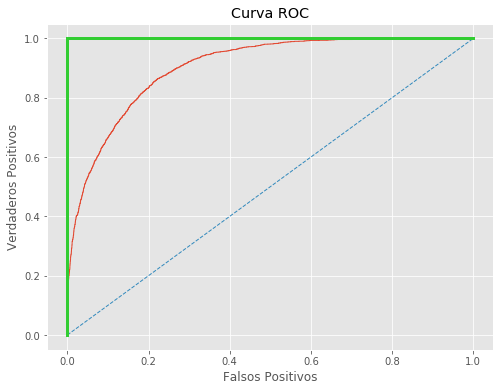

In [56]:
plt.figure(figsize=(8, 6))

# reestimamos los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1.
modelo_predict_final = algoritmo.predict_proba(X_test)[:, 1]

# generamos los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test, modelo_predict_final)

# generamos los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test, modelo_predict_final)

# Plot ROC curve
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')

In [57]:
roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(round(roc_auc, 2))

Curva ROC - AUC del modelo:
0.76


__A primera vista podemos observar que nuestro modelo tiene una curva por sobre la bisectriz. Con un valor de .76, nuestro modelo tiene un desempeño de 26% superior a un mecanismo de clasificación aleatoria.__